In [2]:
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(font_scale=1.5)
p = sns.color_palette("Set2")
sns.palplot(p)
sns.set_palette(p)
cmap = plt.cm.get_cmap('Spectral')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
OUT_GAN = './PR/Synthetic1/'
OUT_VAE = './PR/Synthetic2/'
OUT_REAL = './PR/Real/'
SYN_PATH = './Synthetic/'
N_IMG = 2000

### PR CALCULATION

In [4]:
# Clear directories
for path in [OUT_GAN, OUT_VAE, OUT_REAL]:
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(e)

In [27]:
# Circles
imgs = np.load(SYN_PATH + 'circles.npy')
for i, img in enumerate(imgs):
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(out_real + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

In [96]:
# Mnist
imgs = np.load(SYN_PATH + 'mnist_1000.npy')
for i, img in enumerate(imgs):
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(OUT_REAL + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

In [11]:
# Basic GAN
imgs = np.load(SYN_PATH + 'synthetic_gan.npy')
imgs = imgs / 2 + 0.5  # Rescale to 0->1
for i, img in enumerate(imgs):
    img[img < 0.8] = 0
    img[img >= 0.8] = 1
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(OUT_GAN + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

In [19]:
# Basic VAE
imgs = np.load(SYN_PATH + 'synthetic_vae.npy')
for i, img in enumerate(imgs):
    img[img < 0.8] = 0
    img[img >= 0.8] = 1
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(OUT_VAE + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

In [88]:
# DCGAN
imgs = np.load(SYN_PATH + 'dcgan_1000.npy')
for i, img in enumerate(imgs):
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(OUT_GAN + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

In [80]:
# DCVAE
imgs = np.load(SYN_PATH + 'dcvae_1000.npy')
for i, img in enumerate(imgs):
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(OUT_VAE + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

0.0


In [97]:
# AAE
imgs = np.load(SYN_PATH + 'aae_1000_l8.npy')
for i, img in enumerate(imgs):
    if img.shape[-1] == 1:
        img = img[:, :, 0]
    plt.imsave(OUT_VAE + str(i) + '.png', img, cmap='gray')
    if i == N_IMG:
        break

Example

> cd Desktop/Thesis/Results/PR<br>
> pythonw prd_from_image_folders.py --inception_path Inception/inception.pb --reference_dir Real --eval_dirs Synthetic1 Synthetic2 --eval_labels gan vae --cache_dir Tmp<br>
> pythonw prd_from_image_folders.py --inception_path Inception/inception.pb --reference_dir Real --eval_dirs Synthetic1 --eval_labels gan --cache_dir Tmp
> pythonw prd_from_image_folders.py --inception_path Inception/inception.pb --reference_dir Real --eval_dirs Synthetic2 --eval_labels vae --cache_dir Tmp

### VISUALIZATION

In [6]:
# Circles
pr = np.load(SYN_PATH + '/PR/pr_circles.npy')
pr_1 = pr[0, :, :]
#pr_2 = pr[1, :, :] * 20
pr_2 = pr_1 / 1.6

/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


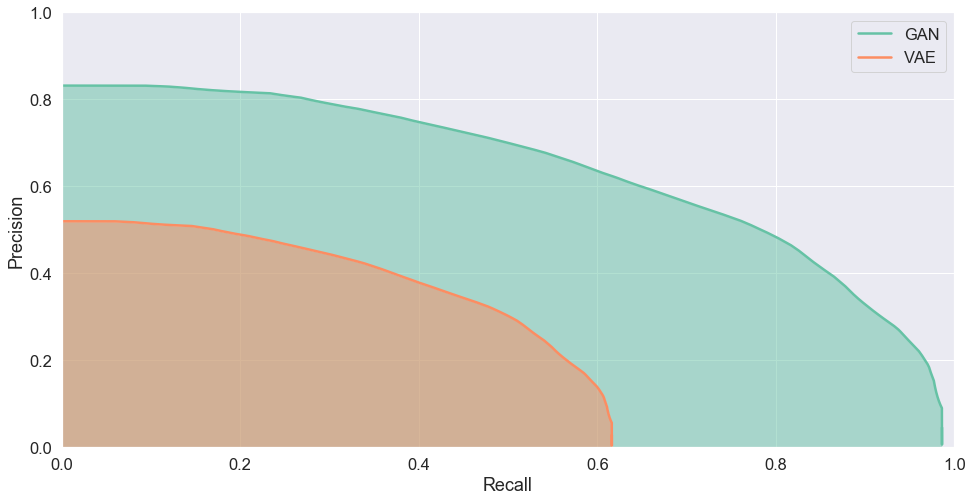

In [7]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=pr_1[1, :], y=pr_1[0, :], label='GAN')
plt.fill_between(x=pr_1[1, :], y1=pr_1[0, :], y2=0, alpha=0.5)
s = sns.lineplot(x=pr_2[1, :], y=pr_2[0, :], label='VAE')
plt.fill_between(x=pr_2[1, :], y1=pr_2[0, :], y2=0, alpha=0.5)
s.set_xlim(0, 1)
s.set_ylim(0, 1)
s.set_xlabel('Recall')
s.set_ylabel('Precision')
plt.savefig('pr-circles', bbox_inches='tight', pad_inches=0)
plt.show()

In [8]:
# MNIST
pr_1 = np.load(SYN_PATH + '/PR/pr_dcgan_1000.npy')[0]
pr_2 = np.load(SYN_PATH + '/PR/pr_dcvae_1000.npy')[0]
pr_3 = np.load(SYN_PATH + '/PR/pr_aae_1000.npy')[0]

/Users/davidboyker/miniconda3/envs/ml/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


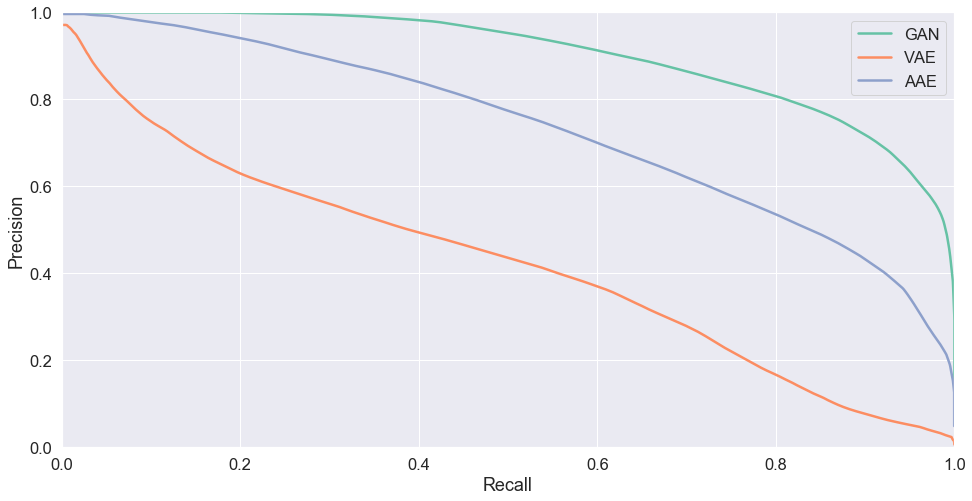

In [9]:
plt.figure(figsize=(16, 8))
sns.lineplot(x=pr_1[1, :], y=pr_1[0, :], label='GAN')
s = sns.lineplot(x=pr_2[1, :], y=pr_2[0, :], label='VAE')
sns.lineplot(x=pr_3[1, :], y=pr_3[0, :], label='AAE')
#plt.fill_between(x=pr_1[1, :], y1=pr_1[0, :], y2=0, alpha=0.5)
#plt.fill_between(x=pr_3[1, :], y1=pr_3[0, :], y2=0, alpha=0.5)
#plt.fill_between(x=pr_2[1, :], y1=pr_2[0, :], y2=0, alpha=0.5)
s.set_xlim(0, 1)
s.set_ylim(0, 1)
s.set_xlabel('Recall')
s.set_ylabel('Precision')
plt.savefig('pr-mnist', bbox_inches='tight', pad_inches=0)
plt.show()